In [143]:
#1. Import the necessary libraries

import pandas as pd
import seaborn as sns
pd.set_option('display.notebook_repr_html',True)
from pandas import DataFrame as df
from google.colab import files
upload = files.upload()

In [0]:
#2. Read the data as a data frame

file_path = './insurance.csv'
df = pd.read_csv(file_path)

In [194]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [196]:
#3a. Shape of the data

print(df.shape)

(1338, 7)


In [197]:
#3b. Data type of each attribute

print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [198]:
#3c. Checking the presence of missing values

print(df.isnull())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
5     False  False  False     False   False   False    False
6     False  False  False     False   False   False    False
7     False  False  False     False   False   False    False
8     False  False  False     False   False   False    False
9     False  False  False     False   False   False    False
10    False  False  False     False   False   False    False
11    False  False  False     False   False   False    False
12    False  False  False     False   False   False    False
13    False  False  False     False   False   False    False
14    False  False  False     False   False   False    False
15    False  False  Fals

In [199]:
#3d. 5 point summary of numerical attributes

from numpy import percentile
def find_five_num_sum(column):
    data = df[column]
    quartiles = percentile(data,[25 ,50 , 75])
    data_min, data_max = data.min(), data.max()
    print('Five point summary of attribute: '+column)
    print('Min: %3f'% data_min)
    print('Q1: %3f'% quartiles[0])
    print('Median: %3f' %quartiles[1])
    print('Q2: %3f' %quartiles[2])
    print('Max: %3f' %data_max)

find_five_num_sum('age')
find_five_num_sum('bmi')
find_five_num_sum('children')
find_five_num_sum('charges')

Five point summary of attribute: age
Min: 18.000000
Q1: 27.000000
Median: 39.000000
Q2: 51.000000
Max: 64.000000
Five point summary of attribute: bmi
Min: 15.960000
Q1: 26.296250
Median: 30.400000
Q2: 34.693750
Max: 53.130000
Five point summary of attribute: children
Min: 0.000000
Q1: 0.000000
Median: 1.000000
Q2: 2.000000
Max: 5.000000
Five point summary of attribute: charges
Min: 1121.873900
Q1: 4740.287150
Median: 9382.033000
Q2: 16639.912515
Max: 63770.428010


AxesSubplot(0.125,0.125;0.775x0.755)


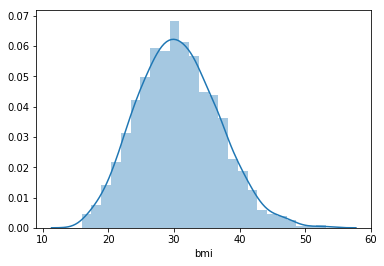

In [150]:
#3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

print(sns.distplot(df.bmi))

AxesSubplot(0.125,0.125;0.775x0.755)


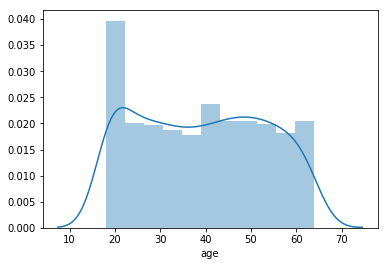

In [151]:
print(sns.distplot(df.age))

AxesSubplot(0.125,0.125;0.775x0.755)


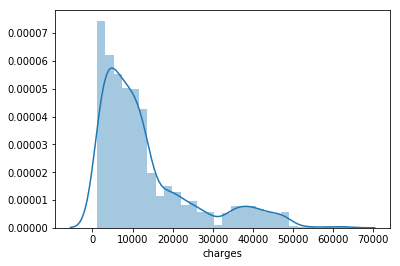

In [152]:
print(sns.distplot(df.charges))

In [153]:
#3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

print(df.skew(axis=0))

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


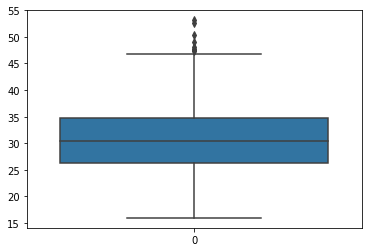

In [154]:
#3g. Checking the presence of outliers in ‘bmi’, ‘age’ and 'charges' columns

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df['bmi'])

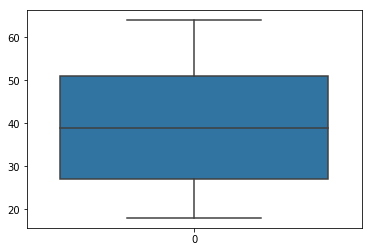

In [155]:
sns.boxplot(data=df['age'])

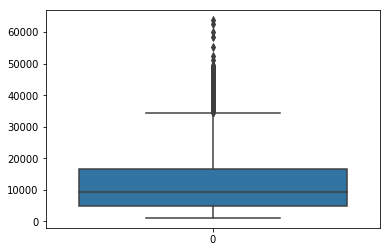

In [156]:
sns.boxplot(data=df['charges'])

In [0]:
#getting count and values of outliers
import numpy as np
def detect_outliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  
  for y in data:
    z_score= (y-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(y)
  print ("Number of outliers: " +str(len(outliers)))
  print (outliers)
  return outliers


In [158]:
outliers = detect_outliers(df["bmi"])

Number of outliers: 4
[49.06, 50.38, 52.58, 53.13]


In [159]:
outliers = detect_outliers(df["age"])

Number of outliers: 0
[]


In [160]:
outliers = detect_outliers(df["charges"])

Number of outliers: 7
[51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


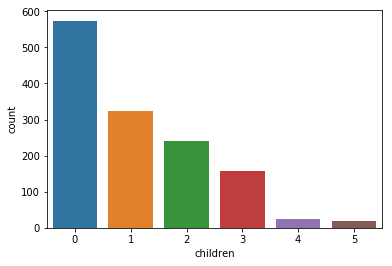

In [161]:
#3h. Distribution of categorical columns (include children)

sns.countplot(df.children)

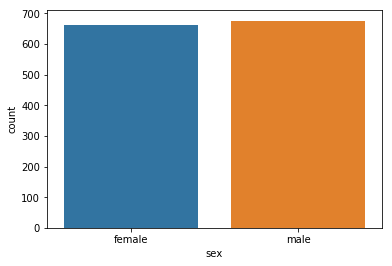

In [162]:
sns.countplot(df.sex)

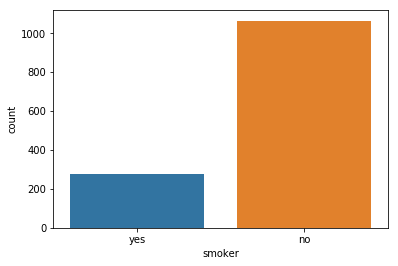

In [163]:
sns.countplot(df.smoker)

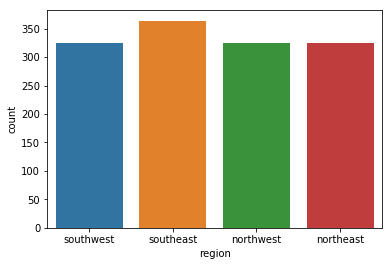

In [164]:
sns.countplot(df.region)

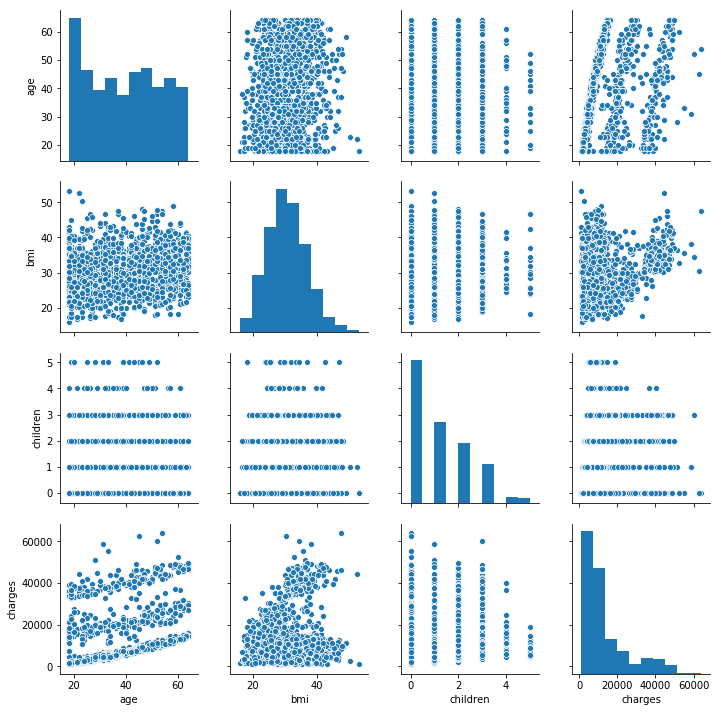

In [165]:
#3i. Pair plot that includes all the columns of the data frame
sns.pairplot(df)

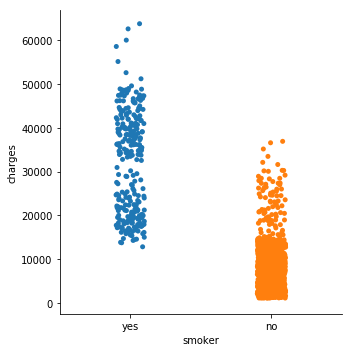

In [166]:
#4a. Do charges of people who smoke differ significantly from the people who don't?
#Ans: yes, As can be seen from the distribution below, charges for people who smoke are significantly on the higher side 
#than the people who dont smoke.

#graphically 
sns.catplot(x="smoker",y="charges",data=df)

In [173]:
#statistically from Z test
#H0 = There is significant difference between smoking and expenses
#H1 = There is no significance difference between smoking and expenses
import scipy.stats as st
sample_data= df[df.smoker=="yes"].sample(30)
sample_charges_mean = sample_data.charges.mean()
pop_mean= df.charges.mean()
pop_std= df.charges.std()

n=30
#calculating z value 
z_value= (sample_charges_mean - pop_mean)/np.sqrt(pop_std*pop_std/n)
print (z_value)

#calculating probability value
p_val= 2*(1-st.norm.cdf(z_value))
print (p_val)
if p_val> .05:  
        print ("H0 will be rejected- There is no significant difference between smoking and expenses")
else:
        print ("H0 will be accepted- There is significance difference between smoking and expenses")
         
        
       

9.055495797900821
0.0
H0 will be accepted- There is significance difference between smoking and expenses


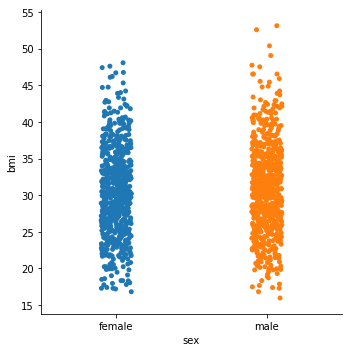

In [168]:
#4b. Does bmi of males differ significantly from that of females?
#Ans. No, there is no significant difference in bmi of male and females.

sns.catplot(x="sex",y="bmi",data=df)

In [201]:
#statistically from 2-T test

#H0 yes, bmi of males differ significantly from that of females
#H1 No, bmi of males does not differ significantly from that of females

from scipy import stats
bmi_sample_female = df[df.sex == "female"].sample(30)
bmi_sample_male = df[df.sex == "male"].sample(30)

result = stats.ttest_ind(bmi_sample_female.bmi ,bmi_sample_male.bmi,equal_var=False)
p_val = result[1]
print (p_val)
if p_val>0.05:
  print ("H0 will be rejected-No, bmi of males does not differ significantly from that of females")
else:
  print ("H0 will be accepted-yes, bmi of males differ significantly from that of females")

0.8945148222763826
H0 will be rejected-No, bmi of males does not differ significantly from that of females


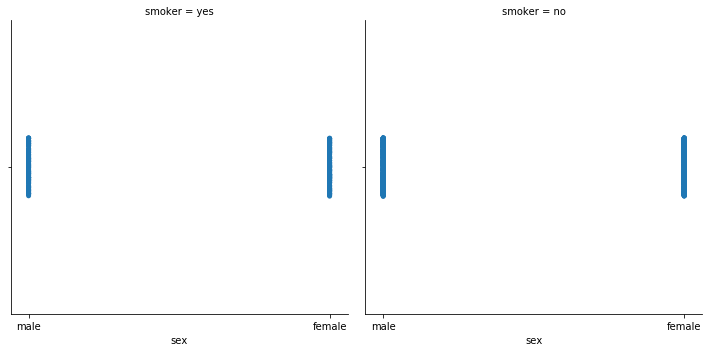

In [170]:
#4c. Is the proportion of smokers significantly different in different genders?
#Ans. No, There is no significant difference in number of smokers based on gender.

sns.catplot(x="sex",col="smoker",data=df)

In [211]:
#statistically from chi-square test
#H0 - proportion of smokers is significantly different in different genders
#H1 - proportion of smokers is same across both males and females


chi_sample_male = df[df.sex =="male"].sample(30)
chi_sample_female = df[df.sex =="female"].sample(30)

#grouping the male and female and count smokers and non smokers in both gender
chi_male = chi_sample_male.groupby("smoker").sex.value_counts()
chi_female = chi_sample_female.groupby("smoker").sex.value_counts()

#putting the number of smokers and non smokers in a numpy array based on gender

result = np.array([chi_male[0],chi_male[1],chi_female[0],chi_female[1]])

chi2_stat,p_val,dof,ex = stats.chi2_contingency(result)

print (p_val)

if p_val>0.05:
  print ("H0 will be rejected-proportion of smokers is same across both males and females")
else:
  print ("H0 will be accepted-proportion of smokers is significantly different in different genders")

1.0
H0 will be rejected-proportion of smokers is same across both males and females


In [0]:
#4d. Is the distribution of bmi across women with no children, one child and two children, the same ?
#Ans. statistically from 2-T test

#H0 yes, distribution is same
#H1 No, distribution is not same

from scipy import stats
bmi_sample_0_child = df[df.children == "0"].sample(30)
bmi_sample_1_child = df[df.children == "1"].sample(30)
bmi_sample_2_child = df[df.children == "2"].sample(30)

result = stats.ttest_ind(bmi_sample_0_child.bmi ,bmi_sample_1_child.bmi,bmi_sample_2_child.bmi, equal_var=False)
p_val = result[1]
print (p_val)
if p_val>0.05:
  print ("H0 will be rejected-No, distribution is not the same")
else:
  print ("H0 will be accepted-yes, distribution is same")



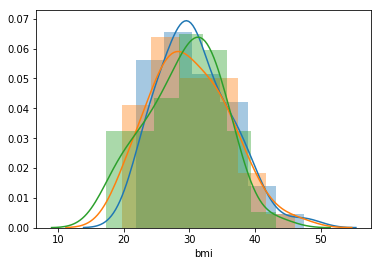

In [187]:
sns.distplot(df_0_child.bmi)
sns.distplot(df_1_child.bmi)
sns.distplot(df_2_child.bmi)